In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline

from datetime import timedelta

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [2]:
from sklearn import preprocessing

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# df_events información de eventos realizado en la plataforma para un conjunto de usuarios hasta el 31/05/2018
df_events = pd.read_csv('../../data/events_up_to_01062018.csv',dtype=object)
# df_train archivo labels_training_set.csv indica para un subconjunto de los usuarios incluidos en el set de 
# eventos events_up_to_01062018.csv si los mismos realizaron una conversión (columna label = 1) o no (columna 
# label = 0) desde el 01/06/2018 hasta el 15/06/2018
df_labels = pd.read_csv('../../data/labels_training_set.csv',dtype=object)
# Personas a predecir conversion.
df_person = pd.read_csv('../../data/trocafone_kaggle_test.csv')

## Descripcion basica de los set de datos con los que trabajo

In [4]:
df_events.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,2341681,2341681,2341681,191131,1320530,1321513,1320530,1320530,1320530,505949,...,106406,204069,204069,204069,204069,204069,204069,204066,204069,204069
unique,1490912,11,38829,248,3693,208,5,8,63,52267,...,4,7,2,2206,122,51,4,393,131,366
top,2018-05-31 01:59:16,viewed product,c76b8417,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,14,1248124,4438,64187,8462,107262,547617,442096,314925,2606,...,105195,91753,165827,36866,57304,197699,103502,73234,46648,57953


In [5]:
df_events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_labels.describe()

,person,label
count,19414,19414
unique,19414,2
top,1dce3766,0
freq,1,18434


In [7]:
df_labels.head(6)

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0
5,db2c4d27,1


In [8]:
df_labels['label'] = df_labels['label'].astype(int)
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 2 columns):
person    19414 non-null object
label     19414 non-null int64
dtypes: int64(1), object(1)
memory usage: 303.4+ KB


In [9]:
df_person.head()

,person
0,4886f805
1,0297fc1e
2,2d681dd8
3,cccea85e
4,4c8a8b93


#### La información de estos archivos debe ser utilizada para entrenar un modelo de Machine Learning, de tal forma de poder indicar la probabilidad de que conjunto seleccionado de usuarios realice una conversión desde el 01/06/2018 al 15/06/2018. 
#### Se pedirá indicar esa probabilidad de conversión para usuarios que no se encuentran en el archivo df_labels_training_set.csv, pero para los cuales se cuenta con información en events_up_to_01062018.csv
#### Los grupos deberán probar distintos algoritmos de Machine Learning para predecir cuál es la probabilidad de conversión del conjunto de usuarios seleccionados de Trocafone para la competencia en el periodo descrito. A medida que los grupos realicen pruebas deben realizar el correspondiente submit en Kaggle para evaluar el resultado de los mismos.
#### Al finalizar la competencia el grupo que mejor resultado tenga obtendrá 10 puntos para cada uno de sus integrantes que podrán ser usados en el examen por promoción o segundo recuperatorio.


El TP2 se va a evaluar en función del siguiente criterio:

* Cantidad de trabajo (esfuerzo) del grupo: ¿Probaron muchos algoritmos? ¿Hicieron un buen trabajo de pre-procesamiento de los datos y feature engineering?
* Resultado obtenido en Kaggle (obviamente cuanto mejor resultado mejor nota)
* Presentación final del informe, calidad de la redacción, uso de información obtenida en el TP1, conclusiones presentadas.
* Performance de la solución final.


In [10]:
df_events["timestamp"] = pd.to_datetime(df_events["timestamp"])
df_events["month"] = df_events["timestamp"].dt.month
df_events["day"] = df_events["timestamp"].dt.day

In [11]:
df_events["day_of_week"] = df_events['timestamp'].dt.weekday_name

In [12]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341681 entries, 0 to 2341680
Data columns (total 26 columns):
timestamp                   datetime64[ns]
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
month                       int64
day                         int64
day_of

## Cantidad de veces que realiza un evento dado.

In [13]:
cant_por_evento = pd.concat([pd.get_dummies(df_events['event']),df_events[['person']]],axis = 1).groupby('person')\
    .sum().reset_index()
cant_por_evento.head()

,person,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
0,0008ed71,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1,00091926,15.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,372.0,34.0
2,00091a7a,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
3,000ba417,1.0,24.0,6.0,1.0,14.0,0.0,1.0,0.0,0.0,153.0,6.0
4,000c79fe,1.0,0.0,1.0,0.0,1.0,0.0,1.0,9.0,0.0,3.0,1.0


In [14]:
df_train = pd.merge(cant_por_evento,df_labels, on="person", how="inner").drop(columns = ['person'])
df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19414 entries, 0 to 19413
Data columns (total 12 columns):
ad campaign hit      19414 non-null float64
brand listing        19414 non-null float64
checkout             19414 non-null float64
conversion           19414 non-null float64
generic listing      19414 non-null float64
lead                 19414 non-null float64
search engine hit    19414 non-null float64
searched products    19414 non-null float64
staticpage           19414 non-null float64
viewed product       19414 non-null float64
visited site         19414 non-null float64
label                19414 non-null int64
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


## Cantidad de visitas a los 15 modelos mas visitados

In [15]:
df_events['event'].value_counts()

viewed product       1248124
brand listing         216312
visited site          204069
ad campaign hit       191388
generic listing       160176
searched products     130616
search engine hit     106406
checkout               65315
staticpage             11201
conversion              7091
lead                     983
Name: event, dtype: int64

In [16]:
df_events_visitas_producto = df_events.loc[df_events['event'] == 'viewed product']
top_15 = df_events_visitas_producto['model'].value_counts().head(15).index
df_events_15_productos_mas_visitados = df_events_visitas_producto.loc[df_events_visitas_producto['model'].isin(top_15)]

In [17]:
df_events_15_productos_mas_visitados = df_events_15_productos_mas_visitados[['person','model']]
df_events_15_productos_mas_visitados.head()

,person,model
1,ad93850f,iPhone 5s
2,0297fc1e,iPhone 6S
3,2d681dd8,iPhone 7
6,1b9f7cf6,iPhone 6
7,29ebb414,iPhone 6 Plus


In [18]:
df_events_15_productos_mas_visitados = pd.concat([df_events_15_productos_mas_visitados,\
                    pd.get_dummies(df_events_15_productos_mas_visitados['model'])],axis = 1)

In [19]:
df_events_15_productos_mas_visitados = df_events_15_productos_mas_visitados.groupby('person').sum().reset_index()
df_events_15_productos_mas_visitados.head()

,person,Samsung Galaxy J5,Samsung Galaxy S6 Edge,Samsung Galaxy S6 Flat,Samsung Galaxy S7,Samsung Galaxy S7 Edge,Samsung Galaxy S8,iPhone 5c,iPhone 5s,iPhone 6,iPhone 6 Plus,iPhone 6S,iPhone 6S Plus,iPhone 7,iPhone 7 Plus,iPhone SE
0,00091926,1.0,3.0,15.0,1.0,9.0,5.0,0.0,0.0,5.0,41.0,94.0,51.0,45.0,9.0,3.0
1,00091a7a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,000ba417,11.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,000c79fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,000e4d9e,1.0,5.0,139.0,22.0,2.0,9.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,11.0


In [20]:
# vis = visitas
nombres_columnas = ['vis_'+columna for columna in df_events_15_productos_mas_visitados.columns]
nombres_columnas[0] = 'person'
df_events_15_productos_mas_visitados.columns = nombres_columnas

In [21]:
df_events_15_productos_mas_visitados.head()

,person,vis_Samsung Galaxy J5,vis_Samsung Galaxy S6 Edge,vis_Samsung Galaxy S6 Flat,vis_Samsung Galaxy S7,vis_Samsung Galaxy S7 Edge,vis_Samsung Galaxy S8,vis_iPhone 5c,vis_iPhone 5s,vis_iPhone 6,vis_iPhone 6 Plus,vis_iPhone 6S,vis_iPhone 6S Plus,vis_iPhone 7,vis_iPhone 7 Plus,vis_iPhone SE
0,00091926,1.0,3.0,15.0,1.0,9.0,5.0,0.0,0.0,5.0,41.0,94.0,51.0,45.0,9.0,3.0
1,00091a7a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,000ba417,11.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,000c79fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,000e4d9e,1.0,5.0,139.0,22.0,2.0,9.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,11.0


In [22]:
df_train_sin_labels = pd.merge(df_events_15_productos_mas_visitados,cant_por_evento,on = 'person',how = 'outer')

In [23]:
df_train_sin_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38829 entries, 0 to 38828
Data columns (total 27 columns):
person                        38829 non-null object
vis_Samsung Galaxy J5         29459 non-null float64
vis_Samsung Galaxy S6 Edge    29459 non-null float64
vis_Samsung Galaxy S6 Flat    29459 non-null float64
vis_Samsung Galaxy S7         29459 non-null float64
vis_Samsung Galaxy S7 Edge    29459 non-null float64
vis_Samsung Galaxy S8         29459 non-null float64
vis_iPhone 5c                 29459 non-null float64
vis_iPhone 5s                 29459 non-null float64
vis_iPhone 6                  29459 non-null float64
vis_iPhone 6 Plus             29459 non-null float64
vis_iPhone 6S                 29459 non-null float64
vis_iPhone 6S Plus            29459 non-null float64
vis_iPhone 7                  29459 non-null float64
vis_iPhone 7 Plus             29459 non-null float64
vis_iPhone SE                 29459 non-null float64
ad campaign hit               38829 non-null

In [24]:
# probar 2 alternativas
df_train_sin_labels1 = df_train_sin_labels.dropna()
df_train_sin_labels2 = df_train_sin_labels.fillna(0)

## Visitas a producto por mes

In [25]:
df_visitas_producto_por_mes = df_events.loc[df_events['event'] == 'viewed product']
df_visitas_producto_por_mes = df_visitas_producto_por_mes[['person','month']]
df_visitas_producto_por_mes.head()

,person,month
0,4886f805,5
1,ad93850f,5
2,0297fc1e,5
3,2d681dd8,5
4,cccea85e,5


In [26]:
df_visitas_producto_por_mes = pd.concat([pd.get_dummies(df_visitas_producto_por_mes['month'])\
                                         ,df_visitas_producto_por_mes[['person']]],axis = 1).groupby('person')\
                                        .sum().reset_index()
df_visitas_producto_por_mes.head(20)

,person,1,2,3,4,5
0,00091926,0.0,0.0,0.0,0.0,372.0
1,00091a7a,0.0,0.0,3.0,0.0,0.0
2,000ba417,0.0,0.0,0.0,0.0,153.0
3,000c79fe,0.0,0.0,0.0,0.0,3.0
4,000e4d9e,0.0,0.0,0.0,0.0,339.0
5,000e619d,0.0,0.0,0.0,0.0,28.0
6,001001be,0.0,0.0,0.0,0.0,41.0
7,0010e89a,0.0,0.0,0.0,0.0,1.0
8,0016c4b5,0.0,0.0,0.0,0.0,1.0
9,001802e4,0.0,0.0,0.0,0.0,4.0


In [27]:
nombres_columnas = ['mes_'+str(columna) for columna in df_visitas_producto_por_mes.columns]
nombres_columnas[0] = 'person'
df_visitas_producto_por_mes.columns = nombres_columnas

In [28]:
df_visitas_producto_por_mes.head()

,person,mes_1,mes_2,mes_3,mes_4,mes_5
0,00091926,0.0,0.0,0.0,0.0,372.0
1,00091a7a,0.0,0.0,3.0,0.0,0.0
2,000ba417,0.0,0.0,0.0,0.0,153.0
3,000c79fe,0.0,0.0,0.0,0.0,3.0
4,000e4d9e,0.0,0.0,0.0,0.0,339.0


## Visitas a productos segun condicion, color y almacenamiento de producto.

In [29]:
df_events_visitas_prod = df_events.loc[df_events['event'] == 'viewed product']

In [30]:
df_events_visitas_prod = df_events_visitas_prod[['person','storage','color','condition']]
df_events_visitas_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248124 entries, 0 to 1760140
Data columns (total 4 columns):
person       1248124 non-null object
storage      1248124 non-null object
color        1248124 non-null object
condition    1248124 non-null object
dtypes: object(4)
memory usage: 47.6+ MB


In [31]:
df_events_visitas_prod_condition_storage = pd.concat([df_events_visitas_prod['person'],\
           pd.get_dummies(df_events_visitas_prod['storage']),\
           pd.get_dummies(df_events_visitas_prod['condition'])],axis = 1).groupby('person').sum().reset_index()

In [32]:
df_events_visitas_prod_condition_storage.head()

,person,128GB,16GB,256GB,32GB,4GB,512MB,64GB,8GB,Bom,Bom - Sem Touch ID,Excelente,Muito Bom,Novo
0,00091926,48.0,104.0,10.0,132.0,0.0,0.0,78.0,0.0,102.0,0.0,107.0,162.0,1.0
1,00091a7a,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,000ba417,0.0,108.0,1.0,20.0,1.0,0.0,1.0,22.0,110.0,0.0,11.0,32.0,0.0
3,000c79fe,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,000e4d9e,1.0,108.0,1.0,208.0,0.0,0.0,21.0,0.0,124.0,0.0,53.0,162.0,0.0


In [33]:
# Ver si tengo que sacar categoria Bom - Sem Touch ID y Novo que tiene pocas ocurrencias.

In [34]:
top_10_colores = df_events_visitas_prod['color'].value_counts().head(10).index

In [35]:
df_events_visitas_prod_color = df_events_visitas_prod.loc[df_events_visitas_prod['color'].isin(top_10_colores)]
df_events_visitas_prod_color = pd.concat([df_events_visitas_prod_color['person'],\
                                          pd.get_dummies(df_events_visitas_prod_color['color'])],axis = 1)

In [36]:
df_events_visitas_prod_color = df_events_visitas_prod_color.groupby('person').sum().reset_index()

In [37]:
df_events_visitas_prod_color.head()

,person,Azul,Branco,Cinza espacial,Dourado,Ouro Rosa,Prata,Prateado,Preto,Preto Matte,Rosa
0,00091926,3.0,3.0,65.0,101.0,28.0,1.0,43.0,79.0,29.0,3.0
1,00091a7a,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,4.0,15.0,1.0,14.0,0.0,0.0,0.0,71.0,0.0,7.0
3,000c79fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,000e4d9e,23.0,85.0,14.0,46.0,2.0,6.0,1.0,149.0,0.0,9.0


In [38]:
df_events_visitas_prod_color_storage_condition = pd.merge(df_events_visitas_prod_condition_storage,\
                        df_events_visitas_prod_color, on = 'person', how = 'inner')
df_events_visitas_prod_color_storage_condition.head()

,person,128GB,16GB,256GB,32GB,4GB,512MB,64GB,8GB,Bom,...,Azul,Branco,Cinza espacial,Dourado,Ouro Rosa,Prata,Prateado,Preto,Preto Matte,Rosa
0,00091926,48.0,104.0,10.0,132.0,0.0,0.0,78.0,0.0,102.0,...,3.0,3.0,65.0,101.0,28.0,1.0,43.0,79.0,29.0,3.0
1,00091a7a,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0.0,108.0,1.0,20.0,1.0,0.0,1.0,22.0,110.0,...,4.0,15.0,1.0,14.0,0.0,0.0,0.0,71.0,0.0,7.0
3,000c79fe,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,000e4d9e,1.0,108.0,1.0,208.0,0.0,0.0,21.0,0.0,124.0,...,23.0,85.0,14.0,46.0,2.0,6.0,1.0,149.0,0.0,9.0


## Usuario vuelve o no.

In [39]:
df_events_usuario_vuelve = df_events[['person','new_vs_returning']].dropna().drop_duplicates(subset = 'person', keep = 'last')
df_events_usuario_vuelve['new_vs_returning'] = df_events_usuario_vuelve['new_vs_returning'] == 'Returning'

In [40]:
df_events_usuario_vuelve.rename(columns = {'new_vs_returning':'vuelve'},inplace = True)

In [41]:
df_events_usuario_vuelve.head()

,person,vuelve
2136629,4640420b,True
2136660,f35dddc8,False
2136661,c82ecb12,False
2136662,102f402d,False
2136668,1a6498ed,False


## Estado(region) del usuario

In [42]:
top_20_estados = list(df_events['region'].value_counts().head(21).index)
del top_20_estados[1]
top_20_estados

['Sao Paulo',
 'Minas Gerais',
 'Rio de Janeiro',
 'Bahia',
 'Pernambuco',
 'Ceara',
 'Parana',
 'Rio Grande do Sul',
 'Espirito Santo',
 'Federal District',
 'Maranhao',
 'Goias',
 'Santa Catarina',
 'Para',
 'Rio Grande do Norte',
 'Paraíba',
 'Piaui',
 'Alagoas',
 'Sergipe',
 'Amazonas']

In [43]:
df_events_estado = df_events[['person','region','month']]
df_events_estado = df_events_estado.sort_values('month',ascending = True).dropna()

In [44]:
df_events_estado = df_events_estado.loc[df_events_estado['region'].isin(top_20_estados)]


In [45]:
df_events_estado = df_events_estado.drop_duplicates(subset = 'person', keep = 'last').drop(columns = ['month'])

In [46]:
df_events_estado.head()

,person,region
2151588,0869b313,Pernambuco
2150498,78561ee9,Sao Paulo
2294065,540e67b1,Pernambuco
2248029,041627fe,Federal District
2151706,62acae45,Minas Gerais


In [47]:
# PROBAR 2 OPCIONES (LabelEncoder o con One hot encoding)

le = preprocessing.LabelEncoder()
df_events_estado1 = df_events_estado.copy()

In [48]:
df_events_estado1['region'] = le.fit_transform(df_events_estado1['region'])
df_events_estado1.head()

,person,region
2151588,0869b313,12
2150498,78561ee9,18
2294065,540e67b1,12
2248029,041627fe,5
2151706,62acae45,8


In [49]:
df_events_estado2 = pd.concat([df_events_estado['person'],pd.get_dummies(df_events_estado['region'])],axis=1)
df_events_estado2.head()

,person,Alagoas,Amazonas,Bahia,Ceara,Espirito Santo,Federal District,Goias,Maranhao,Minas Gerais,...,Parana,Paraíba,Pernambuco,Piaui,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Santa Catarina,Sao Paulo,Sergipe
2151588,0869b313,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2150498,78561ee9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2294065,540e67b1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2248029,041627fe,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2151706,62acae45,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Cantidad de veces que accede desde cada dispositivo

In [50]:
df_events_device = df_events.loc[df_events['event'] == 'visited site']

In [51]:
df_events_device = df_events_device[['person','device_type']]

In [52]:
df_events_device = pd.concat([df_events_device['person'],pd.get_dummies(df_events_device['device_type'])],axis = 1)

In [53]:
df_events_device.drop(columns = ['Unknown'],inplace = True)

In [54]:
df_events_device = df_events_device.groupby('person').sum().reset_index()

In [55]:
df_events_device

,person,Computer,Smartphone,Tablet
0,0008ed71,2.0,0.0,0.0
1,00091926,34.0,0.0,0.0
2,00091a7a,0.0,1.0,0.0
3,000ba417,6.0,0.0,0.0
4,000c79fe,0.0,1.0,0.0
5,000e4d9e,13.0,0.0,0.0
6,000e619d,5.0,0.0,0.0
7,001001be,0.0,3.0,0.0
8,0010e89a,1.0,0.0,0.0
9,0016c4b5,0.0,1.0,0.0


In [56]:
# Lo mismo se podria hacer pero considerando las visitas a producto desde cada movil.
# Ver.

## Visitas a la pagina segun resolucion

In [57]:
df_events_resolucion = df_events.loc[df_events['event'] == 'visited site']
df_events_resolucion = df_events_resolucion[['person','screen_resolution']].dropna()

In [58]:
top_5_resoluciones = df_events_resolucion['screen_resolution'].value_counts().head(5).index
df_events_resolucion = df_events_resolucion.loc[df_events_resolucion['screen_resolution'].isin(top_5_resoluciones)]
df_events_resolucion = pd.concat([df_events_resolucion['person'],\
        pd.get_dummies(df_events_resolucion['screen_resolution'])],axis = 1).groupby('person').sum().reset_index()
df_events_resolucion.head()

,person,1360x768,1366x768,1920x1080,320x534,360x640
0,0008ed71,0.0,0.0,2.0,0.0,0.0
1,00091a7a,0.0,0.0,0.0,0.0,1.0
2,000c79fe,0.0,0.0,0.0,0.0,1.0
3,001001be,0.0,0.0,0.0,0.0,3.0
4,0010e89a,0.0,1.0,0.0,0.0,0.0


In [59]:
df_events_resolucion.describe()

,1360x768,1366x768,1920x1080,320x534,360x640
count,26987.000000,26987.000000,26987.000000,26987.000000,26987.000000
mean,0.245007,1.843851,0.294512,0.282803,2.713677
std,2.284352,6.101054,2.531278,2.205412,7.607849
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000
max,133.000000,246.000000,146.000000,124.000000,293.000000


In [60]:
# Creo que es mucho 20 resoluciones, probar (quizas empeore)..

## Visitas a la pagina segun sistema operativo

In [61]:
df_events_sistema = df_events.loc[df_events['event'] == 'visited site']
df_events_sistema = df_events_sistema[['person','operating_system_version']].dropna()

In [62]:
top_5_sistemas = df_events_sistema['operating_system_version'].value_counts().head(5).index
df_events_sistema = df_events_sistema.loc[df_events_sistema['operating_system_version'].isin(top_5_sistemas)]
df_events_sistema = pd.concat([df_events_sistema['person'],\
        pd.get_dummies(df_events_sistema['operating_system_version'])],axis = 1).groupby('person').sum().reset_index()
df_events_sistema.head()

,person,Android 6,Android 6.0.1,Android 7,Windows 10,Windows 7
0,0008ed71,0.0,0.0,0.0,2.0,0.0
1,00091926,0.0,0.0,0.0,0.0,34.0
2,000ba417,0.0,0.0,0.0,6.0,0.0
3,000c79fe,0.0,0.0,1.0,0.0,0.0
4,000e4d9e,0.0,0.0,0.0,13.0,0.0


## Visitas a la pagina segun version del navegador

In [63]:
df_events_navegador = df_events.loc[df_events['event'] == 'visited site']
df_events_navegador = df_events_navegador[['person','browser_version']].dropna()

In [64]:
top_5_navegadores = df_events_navegador['browser_version'].value_counts().head(5).index
df_events_navegador = df_events_navegador.loc[df_events_navegador['browser_version'].isin(top_5_navegadores)]
df_events_navegador = pd.concat([df_events_navegador['person'],\
        pd.get_dummies(df_events_navegador['browser_version'])],axis = 1).groupby('person').sum().reset_index()
df_events_navegador.head()

,person,Chrome 65.0,Chrome 66.0,Chrome Mobile 64.0,Chrome Mobile 65.0,Chrome Mobile 66.0
0,0008ed71,0,2,0,0,0
1,00091926,0,34,0,0,0
2,000ba417,0,6,0,0,0
3,000c79fe,0,0,0,0,1
4,000e619d,0,5,0,0,0


## Campaign source

In [65]:
df_events_campaign = df_events[['person','campaign_source']].dropna()

In [66]:
top_5_campanias = df_events_campaign['campaign_source'].value_counts().head(5).index
df_events_campaign = df_events_campaign.loc[df_events_campaign['campaign_source'].isin(top_5_campanias)]
df_events_campaign = pd.concat([df_events_campaign['person'],\
        pd.get_dummies(df_events_campaign['campaign_source'])],axis = 1).groupby('person').sum().reset_index()
df_events_campaign.head()

,person,criteo,emblue,google,rtbhouse,zanox
0,00091926,1.0,0.0,13.0,1.0,0.0
1,00091a7a,0.0,0.0,1.0,0.0,0.0
2,000ba417,0.0,0.0,1.0,0.0,0.0
3,000c79fe,0.0,0.0,1.0,0.0,0.0
4,000e4d9e,0.0,0.0,4.0,0.0,9.0


## Dia de la semana que accede

In [67]:
df_events_dia_visita = df_events.loc[df_events['event'] == 'visited site']
df_events_dia_visita = df_events_dia_visita[['person','day_of_week']]

In [68]:
df_events_dia_visita = pd.concat([df_events_dia_visita['person'],\
                                 pd.get_dummies(df_events_dia_visita['day_of_week'])],axis = 1)\
                                .groupby('person').sum().reset_index()

In [69]:
df_events_dia_visita.head()

,person,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0008ed71,0,0,0,0,2,0,0
1,00091926,3,2,5,11,6,4,3
2,00091a7a,0,1,0,0,0,0,0
3,000ba417,0,0,2,0,4,0,0
4,000c79fe,0,0,0,0,0,1,0


In [70]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341681 entries, 0 to 2341680
Data columns (total 26 columns):
timestamp                   datetime64[ns]
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
month                       int64
day                         int64
day_of

### Prueba

In [399]:
df_train_sin_labels = 0

In [400]:
df_train_sin_labels = pd.merge(cant_por_evento,df_visitas_producto_por_mes,on = 'person', how = 'inner')

In [401]:
df_train_sin_labels = pd.merge(df_train_sin_labels,df_events_visitas_prod_color_storage_condition,on = 'person', how = 'inner')

In [402]:
df_train_sin_labels = pd.merge(df_train_sin_labels,df_events_usuario_vuelve,on = 'person', how = 'inner')

In [403]:
df_train_sin_labels = pd.merge(df_train_sin_labels,df_events_dia_visita,on = 'person', how = 'inner')

In [404]:
df_train_sin_labels = pd.merge(df_train_sin_labels,df_events_device,on = 'person', how = 'inner')

In [405]:
df_train_sin_labels = pd.merge(df_train_sin_labels,df_events_estado1,on = 'person', how = 'inner')

In [406]:
df_train_sin_labels = pd.merge(df_train_sin_labels,df_events_15_productos_mas_visitados,on = 'person', how = 'inner')

In [337]:
df_train_sin_labels.describe()

,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,...,vis_Samsung Galaxy S8,vis_iPhone 5c,vis_iPhone 5s,vis_iPhone 6,vis_iPhone 6 Plus,vis_iPhone 6S,vis_iPhone 6S Plus,vis_iPhone 7,vis_iPhone 7 Plus,vis_iPhone SE
count,25039.000000,25039.000000,25039.00000,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000,...,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000,25039.000000
mean,6.116538,7.238708,1.90363,0.217381,5.369024,0.034267,3.417269,4.385758,0.380167,42.812333,...,1.092536,0.939335,3.382723,3.621111,1.118575,3.323296,1.330804,2.050042,1.536723,1.281321
std,12.766958,28.305632,3.16724,1.167903,12.198331,0.423216,8.168708,14.538029,1.776337,93.023804,...,4.780386,6.568815,14.395877,13.474810,7.291964,15.795292,9.482114,9.537776,8.273681,8.845250
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.00000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,6.000000,2.00000,0.000000,6.000000,0.000000,4.000000,3.000000,0.000000,42.500000,...,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,523.000000,1891.000000,197.00000,129.000000,470.000000,38.000000,762.000000,634.000000,69.000000,2355.000000,...,173.000000,346.000000,832.000000,603.000000,499.000000,679.000000,622.000000,460.000000,326.000000,554.000000


In [338]:
df_train_con_labels = pd.merge(df_train_sin_labels, df_labels, on="person", how="inner").drop(columns = ['person'])

In [339]:
X, y = df_train_con_labels.iloc[:,:-1],df_train_con_labels.iloc[:,-1]

In [389]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [390]:
dtrain = xgb.DMatrix(X_train,label = y_train)
dtest = xgb.DMatrix(X_test,label = y_test)

In [411]:
params['eval_metric'] = "auc"
params['n_estimators'] = 6
params['min_child_weight'] = 1;

In [392]:
params

{'objective': 'binary:hinge',
 'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'alpha': 10,
 'n_estimators': 100,
 'scale_pos_weight': 1,
 'min_child_weight': 1,
 'eval_metric': 'auc'}

In [412]:
xg_reg = xgb.train(params,dtrain,num_boost_round=999,evals=[(dtest,"Test")],early_stopping_rounds=10)

[19:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	Test-auc:0.5
Will train until Test-auc hasn't improved in 10 rounds.
[19:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[1]	Test-auc:0.5
[19:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[2]	Test-auc:0.5
[19:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[3]	Test-auc:0.5
[19:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[4]	Test-auc:0.5
[19:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[5]	Test-auc:0.731905
[19:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[6]	Test-auc:0.569557
[19:29:02] src/tree/updater_prune

In [345]:
xg_reg = xgb.XGBRegressor(objective ='binary:hinge', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 1, min_child_weight=1)

TypeError: train() got an unexpected keyword argument 'objective'

In [342]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=6,
       n_jobs=1, nthread=None, objective='binary:hinge', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [394]:
preds = xg_reg.predict(dtest)

In [397]:
train_accuracy = accuracy_score(y_train, xg_reg.predict(X_train))
test_accuracy = accuracy_score(dtest, preds)
matriz_de_confusion = confusion_matrix(dtest, preds)
area_debajo_de_curva = roc_auc_score(dtest, preds)

print("Train accuracy: ", train_accuracy)
print("Test acuracy: ", test_accuracy)
print("ROC auc score: ", area_debajo_de_curva)
print("Confusion matrix: ")
print(matriz_de_confusion)

TypeError: Expected sequence or array-like, got <class 'xgboost.core.DMatrix'>

In [93]:


params = {"objective":'binary:hinge','colsample_bytree': 0.8,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10, 'n_estimators' : 100, 'scale_pos_weight': 1,'min_child_weight': 1}


cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=60,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="auc", as_pandas=True, seed=123)

[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_de

[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_dep

[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_d

[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_de

[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_d

[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[12:12:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_dept

[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:12:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_dept

[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_de

[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_de

[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[12:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_

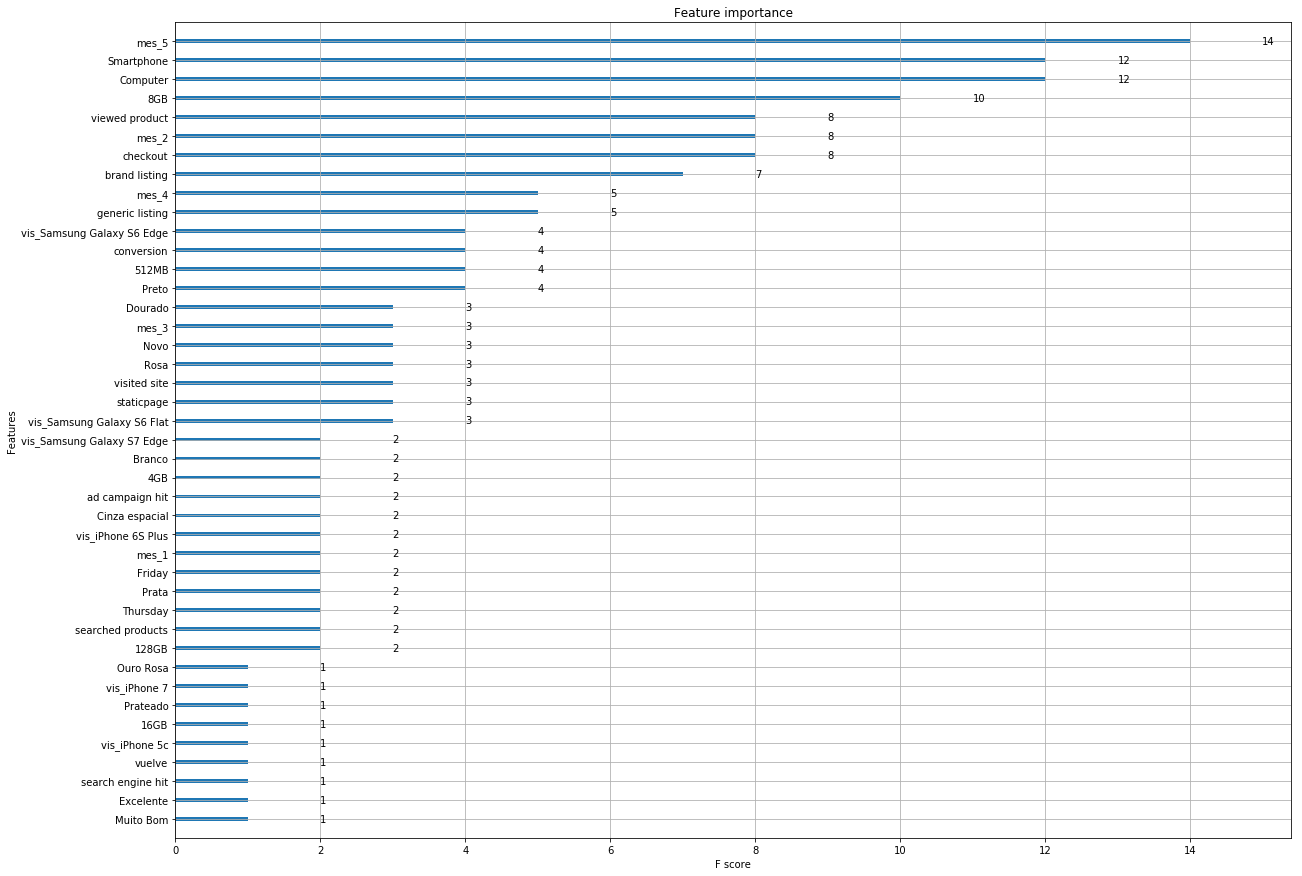

In [121]:
plt.figure(figsize=(20,15))
xgb.plot_importance(xg_reg, ax=plt.gca())

In [ ]:
df_events['staticpage']

In [387]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341681 entries, 0 to 2341680
Data columns (total 26 columns):
timestamp                   datetime64[ns]
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
month                       int64
day                         int64
day_of

In [383]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [388]:
df_events['search_term'].value_counts()

Iphone                                                                                                                                   2577
iPhone 6                                                                                                                                 2242
Iphone 6                                                                                                                                 2185
Iphone 6s                                                                                                                                1816
iphone 6                                                                                                                                 1722
iphone 6s                                                                                                                                1644
J7                                                                                                                                       1499
J5    

In [384]:
gridsearch_params

[(9, 5), (9, 6), (9, 7), (10, 5), (10, 6), (10, 7), (11, 5), (11, 6), (11, 7)]